### Scraping Health Board's Posts and Articles

In this project, we focus on extracting posts and articles from Health Board forums using web scraping techniques. Health Board is a platform with a wealth of user-generated content on various health topics, making it an excellent resource for applications such as sentiment analysis, trend monitoring, and topic modeling.

#### Objectives
- **Data Collection**: Retrieve posts and articles from specific health-related categories on Health Board based on topic criteria (e.g., mental health, fitness).
- **Data Processing**: Clean and preprocess the extracted data to prepare it for analysis.
- **Data Storage**: Store the scraped data in a structured format, such as CSV or a database, for further analysis.

#### Tools and Technologies
- **Python**: The primary programming language for web scraping.
- **Beautiful Soup**: A library for parsing HTML and extracting data.
- **Requests**: A library for making HTTP requests to access web pages.
- **Pandas**: A data manipulation library to handle and analyze the scraped data.

#### Getting Started
1. **Set Up the Environment**: Install the necessary libraries using pip.
2. **Define Scraping Logic**: Write functions to scrape data from specific health categories on Health Board.
3. **Run the Scraper**: Execute the scraping script and monitor the data collection process.
4. **Analyze the Data**: Use Pandas to analyze the collected posts and articles for insights.

#### Conclusion
This project serves as a practical introduction to web scraping and data analysis using Python, providing valuable experience in handling real-world data from an online health community.


<p style="color:#FE4406;text-align:center;font-size:30px"> Scraping Health board's  Posts And Articles </p>

In [34]:
!pip install bs4
!pip install selenium


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
# importing packages
import requests
from bs4 import BeautifulSoup

### Scraping Health Boards

In [6]:
## importing libraries
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time
from bs4 import BeautifulSoup

<p style="color:#FFC107;text-align:left;font-size:20px"> Searching for Health Board's health related topics  </p>

In [41]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
from bs4 import BeautifulSoup

# Set up the Selenium WebDriver
driver = webdriver.Chrome()  # Ensure you have the correct WebDriver
communities = []

# URL to scrape
url = 'https://www.healthboards.com/boards/hbcategory.php'
driver.get(url)

# Allow the page to load
time.sleep(5)

def scrape_current_page():
    # Get the page source
    page_source = driver.page_source
    soup = BeautifulSoup(page_source, 'html.parser')

    # Find all posts in the page (use the common class or structure to target posts)
    communities_elements = soup.find_all('b')

    new_content_found = False
    titlesList=soup.find_all("font")
    
    for community_element in titlesList:
        try:
            category=(community_element.contents[0])
            aElement=((community_element.parent.parent.parent))
            for element in aElement.next_siblings:
                if(str(element).startswith("<li>")):
                    topicLink=(element.a["href"])
                    topicName=(element.a.contents[0])
                    # Ensure the list exists
                    element={}
                    element["topicName"]=topicName
                    element["topicLink"]=topicLink
                    if(element not in communities):
                        communities.append(element)  
        except Exception as e:
            print(f"Error processing post: {e}")

    return new_content_found
# Scrape content from the current page
content_found = scrape_current_page()
# Close the driver when done
driver.quit()



In [44]:
# convert the topicLinks list to a dataset 
import pandas as pd
communities=pd.DataFrame(communities)
communities.head()

,topicName,topicLink
0,Addison's Disease,https://www.healthboards.com/boards/forumdispl...
1,Arthritis,https://www.healthboards.com/boards/forumdispl...
2,Autoimmune Disorders,https://www.healthboards.com/boards/forumdispl...
3,Chronic Fatigue,https://www.healthboards.com/boards/forumdispl...
4,Diabetes,https://www.healthboards.com/boards/forumdispl...


In [ ]:
import time
import pandas as pd
import requests


# List to store the final URLs
urls = []

# Function to get the final URL after redirects
def get_final_url(url):
    try:
        # Make a request to the URL to follow any redirects
        response = requests.get(url, allow_redirects=True)
        # Return the final URL after all redirects
        return response.url
    except requests.exceptions.RequestException as e:
        print(f"Error while accessing {url}: {e}")
        return None

# Loop through each topic and extract the URL after redirects
for index, row in communities.iterrows():
    topic_url = row['topicLink']  # Assuming your CSV contains a column 'topicLink' with the links
    final_url = get_final_url(topic_url)
    communities.loc[index,'topicLink']=final_url
    print(final_url)
    urls.append(final_url)

communities.to_csv("../data/healthBoardsTopics.csv")

In [4]:
## Scraping topics from the topics list 
import pandas as pd 
topicsList=pd.read_csv("../data/healthBoards/healthBoardsTopics.csv")

In [ ]:
import re
from bs4 import BeautifulSoup
from datetime import datetime
from urllib.request import urlopen, Request
import pandas as pd

# List to store posts
posts = []

# Function to extract total pages
def get_total_pages(soup):
    try:
        page_info = soup.find("td", class_="vbmenu_control", style="font-weight:normal")
        if page_info:
            match = re.search(r"Page \d+ of (\d+)", page_info.text)
            if match:
                return int(match.group(1))
        return 1
    except Exception as e:
        print(f"Error determining total pages: {e}")
        return 1

# Function to scrape the current page
def scrape_current_page(url, topicTag):
    try:
        headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.5615.137 Safari/537.36'}
        request = Request(url, headers=headers)
        
        # Fetch page content
        with urlopen(request) as response:
            page_source = response.read()

        soup = BeautifulSoup(page_source, 'html.parser')
        table_element = soup.find("table", id="threadslist")

        if table_element:
            tr_elements = table_element.find_all("tr")
            for i in range(5, len(tr_elements)):
                try:
                    content_found = tr_elements[i]
                    author = content_found.find("div", class_="smallfont").contents[0].strip().replace(" ", "")

                    if author != "Administrator":
                        element = {
                            "commentsLink": content_found.find("a", id=re.compile(".*thread_title.*"))['href'],
                            "postTitle": content_found.find("a", id=re.compile(".*thread_title.*")).contents[0],
                            "authorId": author,
                            "postId": content_found.find("a", id=re.compile(".*thread_title.*"))["id"].replace("thread_title_", ""),
                            "commentsCount": content_found.find_all("td", class_="alt2")[1]["title"].split("Replies:")[1].split(",")[0].strip(),
                            "createdAt": content_found.find_all("div", class_="smallfont")[1].contents[0].strip().replace(" ", "") + " " + content_found.find("span", class_="time").contents[0].strip().replace(" ", ""),
                            "collectedAt": datetime.now(),
                            "topicTag": topicTag
                        }
                        print(element)
                        posts.append(element)

                        # Save periodically
                        if len(posts) % 500 == 0:
                            save_posts()
                except Exception as e:
                    print(f"Error processing post: {e}")
                    continue
    except Exception as e:
        print(f"Error scraping URL {url}: {e}")

# Function to save posts periodically
def save_posts():
    try:
        df = pd.DataFrame(posts)
        df.to_csv("../data/healthBoards/healthBordsPosts.csv", index=False)
        print(f"Saved {len(posts)} posts.")
    except Exception as e:
        print(f"Error saving posts: {e}")

# Main script
try:
    for index in range(0, len(topicsList)):
        try:
            topic_url = topicsList.loc[index, "topicLink"]
            topic_tag = topicsList.loc[index, "topicName"]

            headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.5615.137 Safari/537.36'}
            request = Request(topic_url, headers=headers)

            # Fetch first page to determine total pages
            with urlopen(request) as response:
                page_source = response.read()

            first_page_soup = BeautifulSoup(page_source, 'html.parser')
            total_pages = get_total_pages(first_page_soup)
            print(f"The number of total pages is {total_pages}")

            page_number = 1
            while page_number <= total_pages:
                try:
                    if page_number == 1:
                        current_page_url = topic_url
                    else:
                        current_page_url = f"{topic_url}index{page_number}.html"

                    print(f"Navigating to: {current_page_url}")
                    scrape_current_page(current_page_url, topic_tag)
                    page_number += 1
                except Exception as e:
                    print(f"Error processing page {page_number}: {e}")
                    continue

        except Exception as e:
            print(f"Error processing topic index {index}: {e}")
            continue
except Exception as e:
    print(f"Critical error in main loop: {e}")

# Final save
try:
    save_posts()
except Exception as e:
    print(f"Error during final save: {e}")


### Starting collecting posts Texts 

In [24]:
import pandas as pd
import re
from bs4 import BeautifulSoup
import time
from datetime import datetime
from urllib.request import urlopen, Request
from concurrent.futures import ThreadPoolExecutor, as_completed
import os
import logging

# Configure logging
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

# File paths
POSTS_FILE = "../data/healthBoards/healthBordsPosts.csv"
COLLECTED_FILE = "../data/healthBoards/healthBordsPostsFullText.csv"
TEMP_FILE = "../data/healthBoards/healthBordsPostsDataTemp.csv"

# Function to append multiple records to the file
def append_records_to_file(records, file_path=TEMP_FILE):
    if records.empty:
        logging.warning("No records to save.")
        return
    try:
        write_header = not os.path.exists(file_path)  # Add header if file doesn't exist
        records = records.applymap(lambda x: str(x).encode('utf-8', 'ignore').decode('utf-8') if isinstance(x, str) else x)
        records.to_csv(file_path, mode="a", header=write_header, index=False, encoding="utf-8")


        logging.info(f"{len(records)} records appended to {file_path}.")
    except Exception as e:
        logging.error(f"Error saving records to {file_path}: {e}")
# Function to scrape a single post
def scrape_current_page_with_urllib(url):
    try:
        headers = {'User-Agent': 'Mozilla/5.0'}
        request = Request(url, headers=headers)
        with urlopen(request) as response:
            page_source = response.read()
        soup = BeautifulSoup(page_source, 'html.parser')
        element = soup.find("div", id=re.compile(r"post_message_.*"))
        if element:
            text = element.get_text()
            return re.sub(r"\s+", " ", text).strip()
        else:
            return "This post has been deleted by the author."
    except Exception as e:
        logging.error(f"Error processing post {url}: {e}")
        return "An error occurred while scraping the post."

# Function to handle retries
def safe_scrape_with_urllib(url, retries=3):
    for attempt in range(retries):
        result = scrape_current_page_with_urllib(url)
        if "error" not in result.lower():
            return result
        time.sleep(2 ** attempt)  # Exponential backoff
    logging.error(f"Failed after multiple attempts: {url}")
    return "Failed after multiple attempts."

# Function to process posts
def process_post(index, postsDataset):
    try:
        post = postsDataset.iloc[index]
        link = post["commentsLink"]
        resultScr = safe_scrape_with_urllib(link)
        post["postText"] = resultScr  # Update the postText in a thread-safe copy
        logging.info(f"Processed post {index + 1}/{len(postsDataset)}")
        return post
    except Exception as e:
        logging.error(f"Error processing post at index {index}: {e}")
        return None

# Main function to scrape and save
def scrape_and_save(postsDataset, toCollectLinks):
    temp_data = []
    collectedData=0
    with ThreadPoolExecutor(max_workers=8) as executor:
        futures = {executor.submit(process_post, idx, toCollectLinks): idx for idx in range(len(toCollectLinks))}
        for future in as_completed(futures):
            result = future.result()
            if result is not None:
                temp_data.append(result)
                collectedData+=1
            if len(temp_data) >= 100:
                append_records_to_file(pd.DataFrame(temp_data))
                temp_data = []  # Reset temporary data
          

    # Save remaining data
    if temp_data:
        append_records_to_file(pd.DataFrame(temp_data))

# Load datasets
postsDataset = pd.read_csv(POSTS_FILE)
collectedPosts = pd.read_csv(COLLECTED_FILE)

# Find remaining posts to collect
collectedLinks_set = set(collectedPosts["postLink"])
allLinks_set = set(postsDataset["commentsLink"])
toCollectLinks = postsDataset[postsDataset["commentsLink"].isin(allLinks_set - collectedLinks_set)]

# Start scraping
scrape_and_save(postsDataset, toCollectLinks)


In [15]:
import pandas as pd 
data=pd.read_csv("../data/healthBoards/healthBordsPostsDataTemp.csv")
collected=pd.read_csv("../data/healthBoards/healthBordsPostsFullText.csv")

In [16]:
len(collected)+len(data)

328535

In [17]:
collected.drop([ 'Unnamed: 0'],axis=1,inplace=True)

In [18]:
collected.columns

Index(['postIndex', 'postLink', 'postTitle', 'authorName', 'postId',
       'commentsCount', 'collectedAt', 'postTag', 'postFullText'],
      dtype='object')

In [19]:
dataset=pd.DataFrame(columns=['postIndex', 'postLink', 'postTitle',
       'authorName', 'postId', 'commentsCount', 'collectedAt', 'postTag',
       'postFullText'])
dataset["postIndex"]=data.iloc[:,0]
dataset["postLink"]=data.iloc[:,1]
dataset["postTitle"]=data.iloc[:,2]
dataset["authorName"]=data.iloc[:,3]
dataset["postId"]=data.iloc[:,4]
dataset["commentsCount"]=data.iloc[:,5]
dataset["collectedAt"]=data.iloc[:,6]
dataset["postTag"]=data.iloc[:,7]
dataset["postFullText"]=data.iloc[:,8]


In [20]:
dataset.head()

,postIndex,postLink,postTitle,authorName,postId,commentsCount,collectedAt,postTag,postFullText
0,21667,https://www.healthboards.com/boards/bowel-diso...,"23, female, bloating, blood, gas & diarrhea",dd23,1013669,0,2024-11-29 11:26:33.138677,Bowel Disorders,"Hi all, I've been experience my first issue(s)..."
1,21668,https://www.healthboards.com/boards/bowel-diso...,Please help (having rectal prolapse and very w...,yukina2009,1013623,1,2024-11-29 11:26:33.139674,Bowel Disorders,I was constipated for 2-3 days and i started t...
2,21669,https://www.healthboards.com/boards/bowel-diso...,Diarrhea for over a month plus high WBC,stonebrew,1013570,2,2024-11-29 11:26:33.139674,Bowel Disorders,"Male, mid-30s, no health problems, I work out ..."
3,21671,https://www.healthboards.com/boards/bowel-diso...,Painful bowel movements,case1066,1013478,0,2024-11-29 11:26:33.140673,Bowel Disorders,"Hello , just had a few questions here , about ..."
4,77913,https://www.healthboards.com/boards/teen-healt...,"Symptoms include swollen nodes, lump on back o...",EnigZac,916772,0,2024-11-29 12:05:58.405601,Teen Health,"I am suffering from Health Anxiety, Anxiety, a..."


In [21]:
dataset=pd.concat([collected,dataset])

In [22]:
len(dataset)

328535

In [23]:
dataset.to_csv("../data/healthBoards/healthBordsPostsFullText.csv")

<p style="text-align:center;font-size:40px;">
 Dataset Statistics 
</p>

In [11]:
import pandas as pd 
data=pd.read_csv("../data/healthBoards/healthBordsPostsFullText.csv")

In [12]:
# visualize dataset columns
print(data.columns)
# delete the column called Unnamed: 0
data.drop("Unnamed: 0",axis=1,inplace=True)
# visualize dataset columns
print(data.columns)

Index(['Unnamed: 0', 'postIndex', 'postLink', 'postTitle', 'authorName',
       'postId', 'commentsCount', 'collectedAt', 'postTag', 'postFullText'],
      dtype='object')
Index(['postIndex', 'postLink', 'postTitle', 'authorName', 'postId',
       'commentsCount', 'collectedAt', 'postTag', 'postFullText'],
      dtype='object')


In [14]:
# visualize data length 
len(data)

328535

<p style="text-align:center;font-size:30px;">
 A Topic Dataset Statistics 
</p>

In [19]:
# plot the number of topics 

C:\Users\INFOKOM\AppData\Local\Temp\ipykernel_5584\1291570555.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=current_tags.index, y=current_tags.values, palette='viridis')


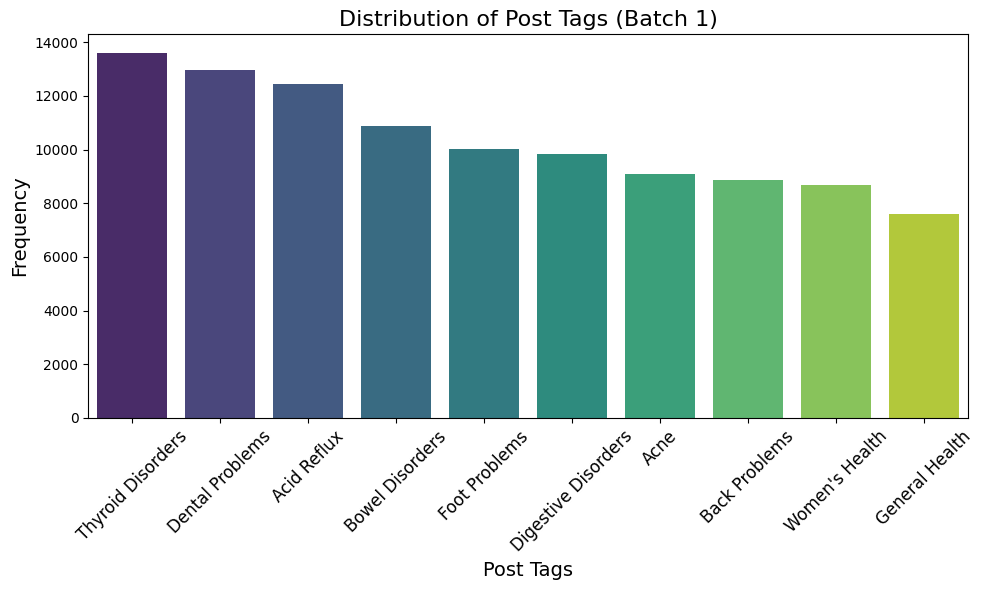

C:\Users\INFOKOM\AppData\Local\Temp\ipykernel_5584\1291570555.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=current_tags.index, y=current_tags.values, palette='viridis')


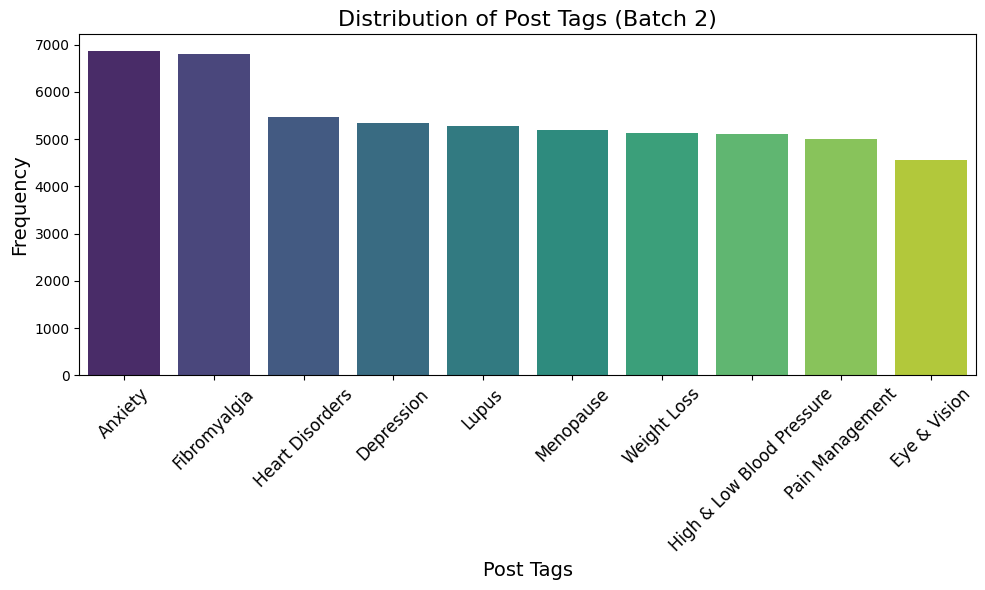

C:\Users\INFOKOM\AppData\Local\Temp\ipykernel_5584\1291570555.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=current_tags.index, y=current_tags.values, palette='viridis')


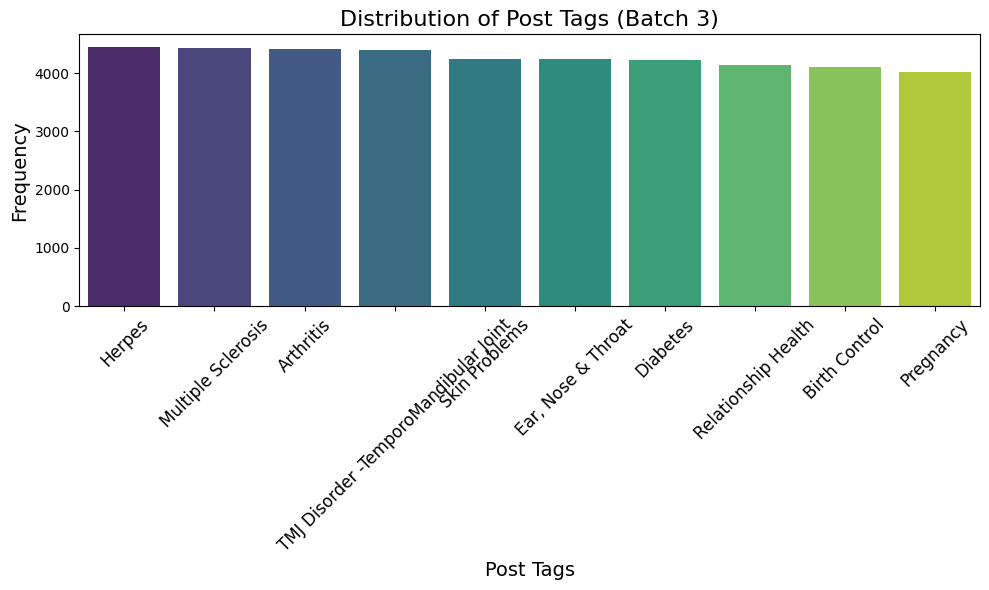

C:\Users\INFOKOM\AppData\Local\Temp\ipykernel_5584\1291570555.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=current_tags.index, y=current_tags.values, palette='viridis')


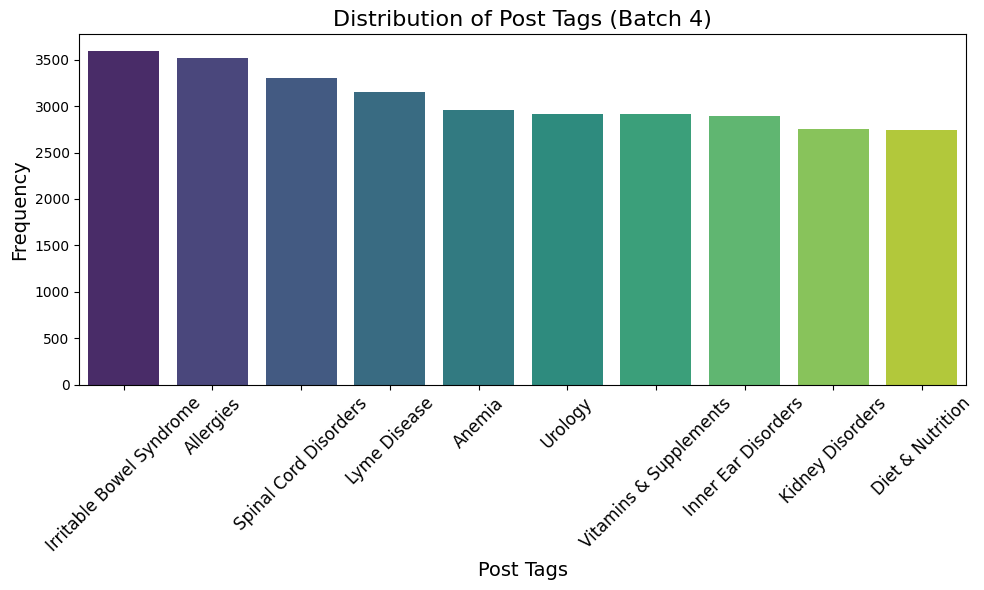

C:\Users\INFOKOM\AppData\Local\Temp\ipykernel_5584\1291570555.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=current_tags.index, y=current_tags.values, palette='viridis')


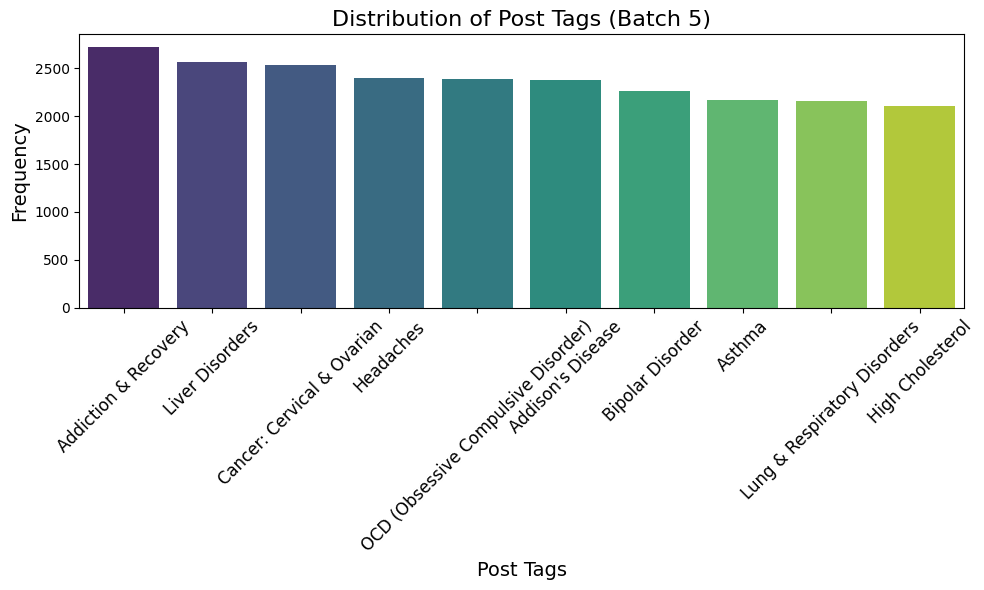

C:\Users\INFOKOM\AppData\Local\Temp\ipykernel_5584\1291570555.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=current_tags.index, y=current_tags.values, palette='viridis')


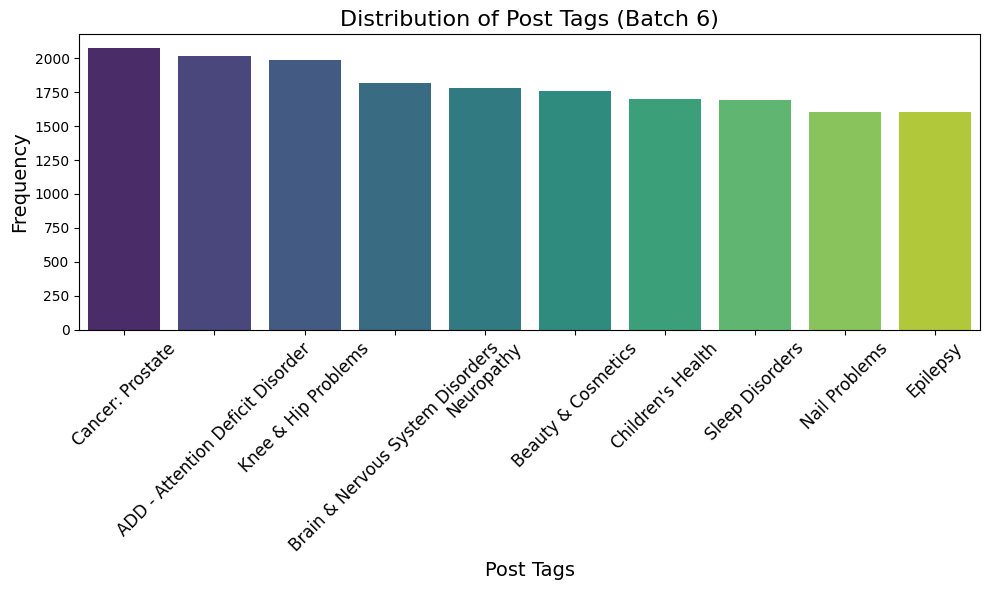

C:\Users\INFOKOM\AppData\Local\Temp\ipykernel_5584\1291570555.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=current_tags.index, y=current_tags.values, palette='viridis')


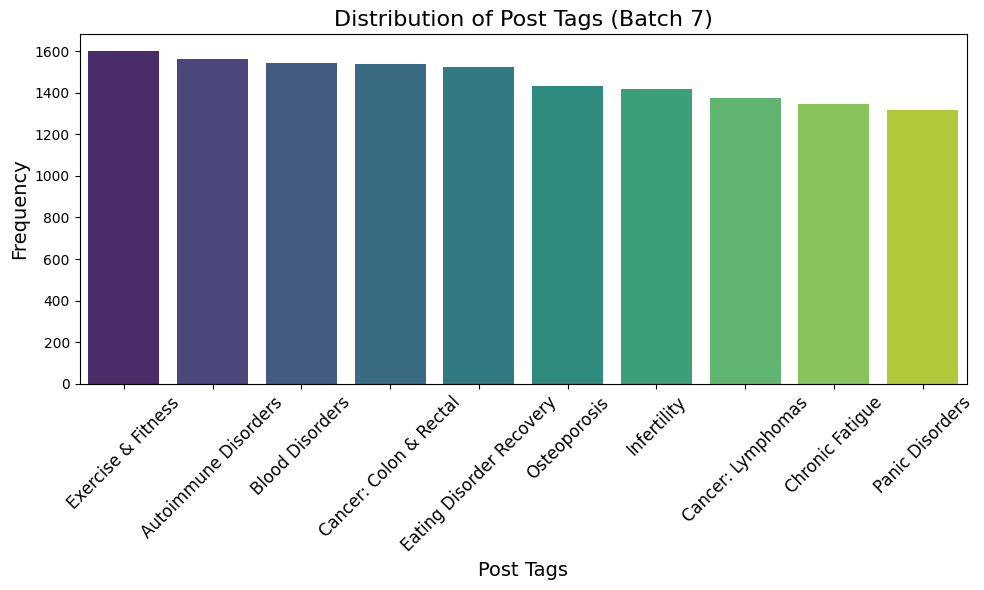

C:\Users\INFOKOM\AppData\Local\Temp\ipykernel_5584\1291570555.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=current_tags.index, y=current_tags.values, palette='viridis')


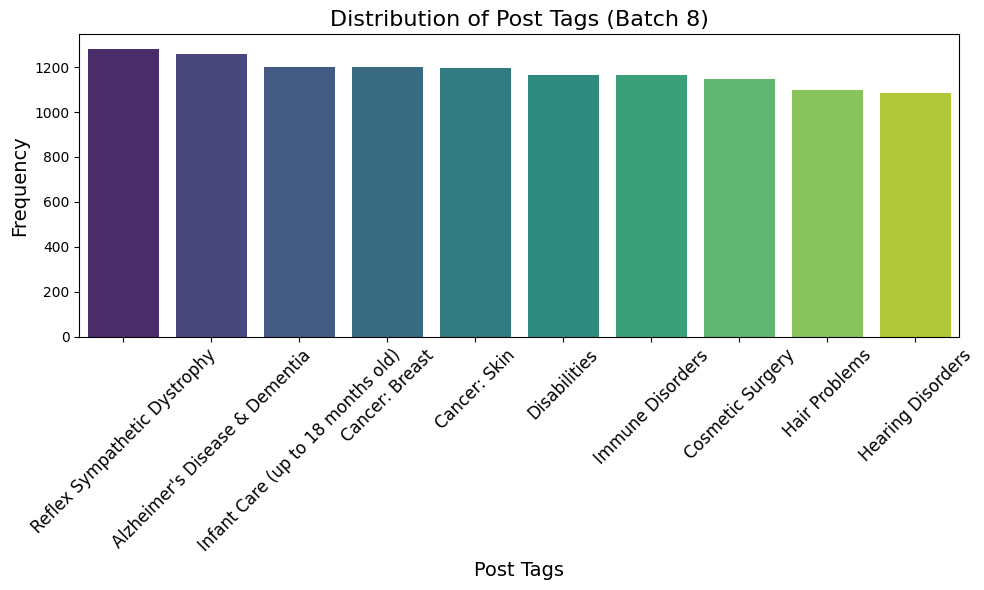

C:\Users\INFOKOM\AppData\Local\Temp\ipykernel_5584\1291570555.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=current_tags.index, y=current_tags.values, palette='viridis')


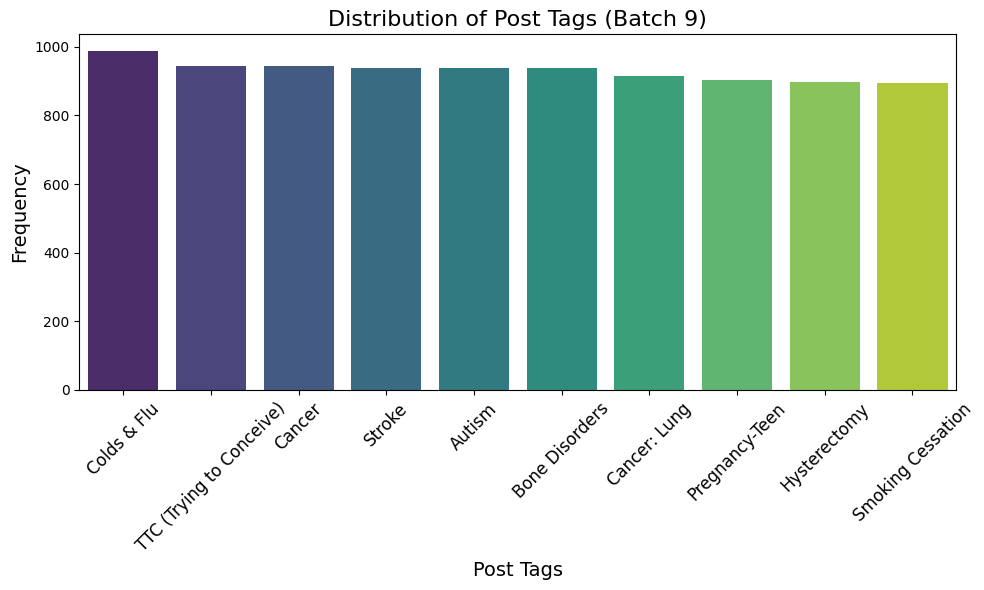

C:\Users\INFOKOM\AppData\Local\Temp\ipykernel_5584\1291570555.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=current_tags.index, y=current_tags.values, palette='viridis')


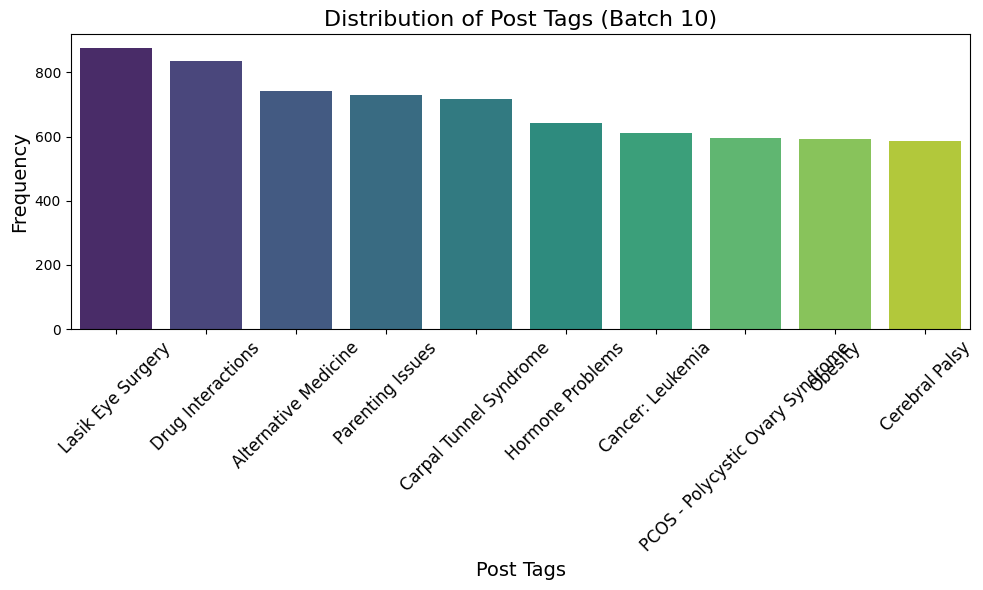

C:\Users\INFOKOM\AppData\Local\Temp\ipykernel_5584\1291570555.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=current_tags.index, y=current_tags.values, palette='viridis')


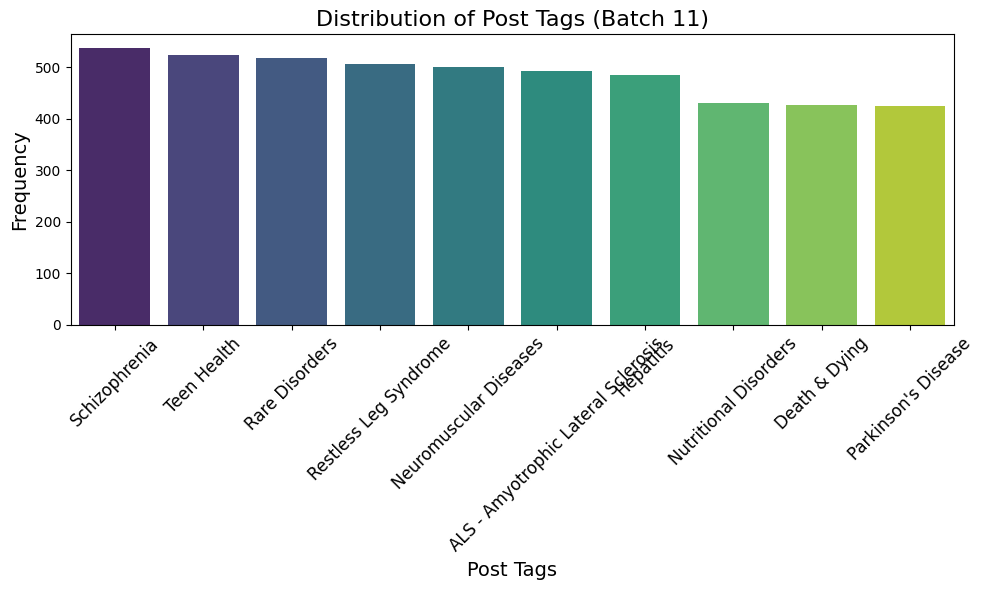

C:\Users\INFOKOM\AppData\Local\Temp\ipykernel_5584\1291570555.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=current_tags.index, y=current_tags.values, palette='viridis')


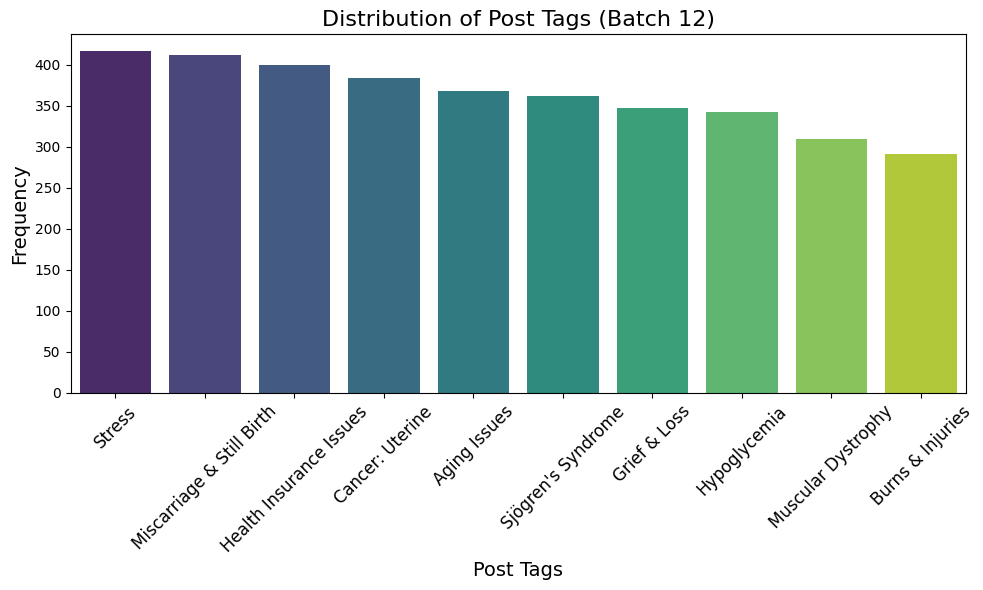

C:\Users\INFOKOM\AppData\Local\Temp\ipykernel_5584\1291570555.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=current_tags.index, y=current_tags.values, palette='viridis')


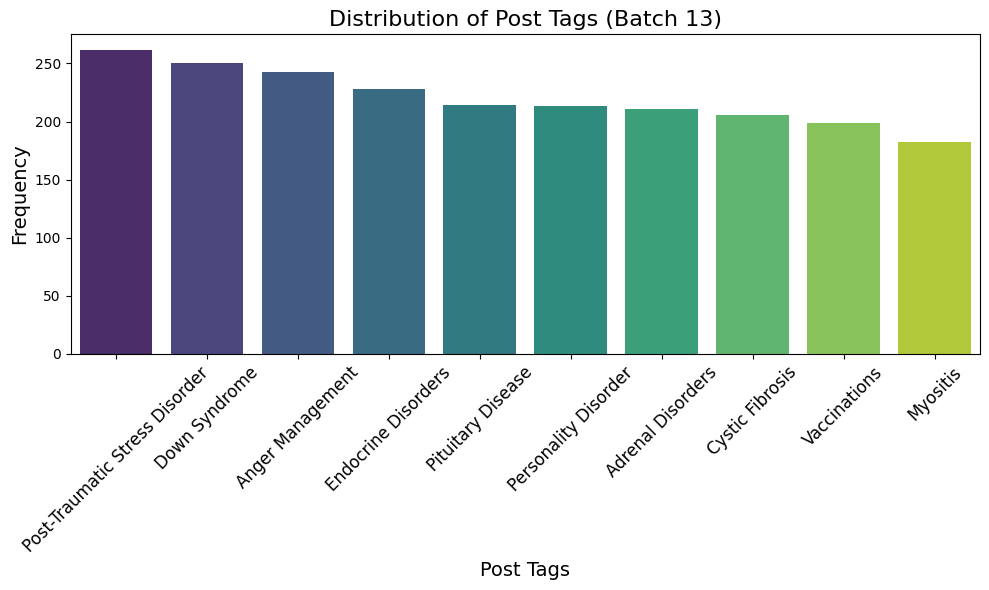

C:\Users\INFOKOM\AppData\Local\Temp\ipykernel_5584\1291570555.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=current_tags.index, y=current_tags.values, palette='viridis')


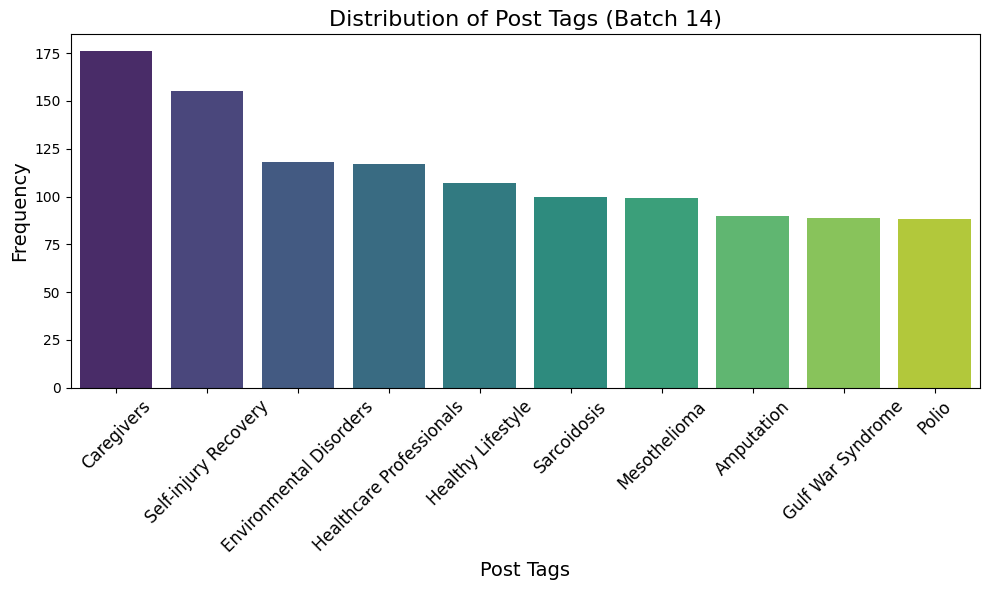

C:\Users\INFOKOM\AppData\Local\Temp\ipykernel_5584\1291570555.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=current_tags.index, y=current_tags.values, palette='viridis')


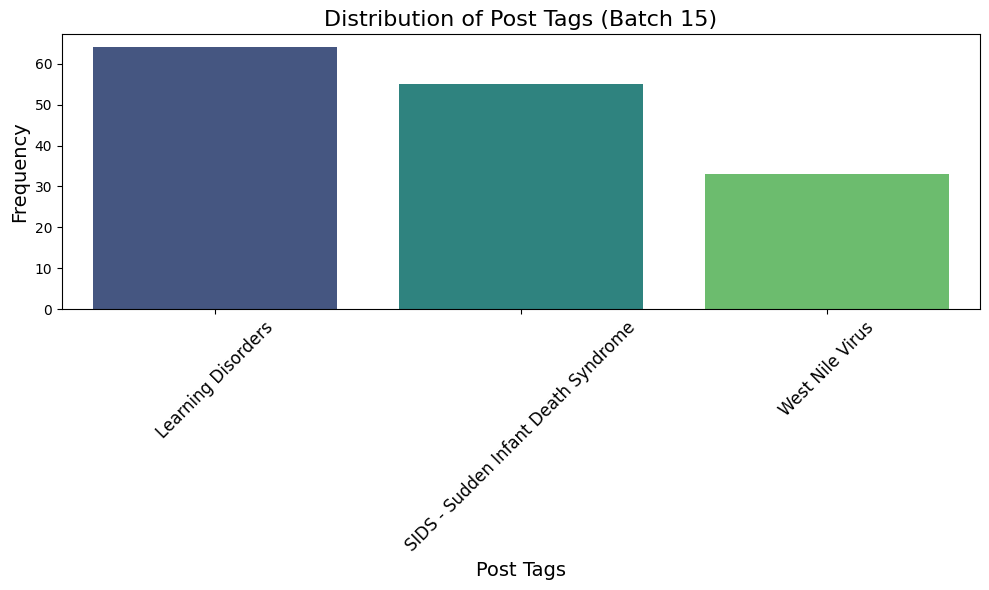

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
# Count the occurrences of each tag
tag_counts = data['postTag'].value_counts()

# Determine the number of plots needed (10 categories per plot)
tags_per_plot = 10
num_plots = (len(tag_counts) + tags_per_plot - 1) // tags_per_plot  # Ceiling division

# Create separate plots
for i in range(num_plots):
    # Select the tags for the current plot
    start_idx = i * tags_per_plot
    end_idx = start_idx + tags_per_plot
    current_tags = tag_counts[start_idx:end_idx]

    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=current_tags.index, y=current_tags.values, palette='viridis')
    plt.title(f'Distribution of Post Tags (Batch {i+1})', fontsize=16)
    plt.xlabel('Post Tags', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.tight_layout()
    plt.show()
